# 1. Install depedencies

In [1]:
!python --version

Python 3.13.11


In [2]:
!conda install -q --yes numpy # -q stands for --quite

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/anaconda3/envs/uzslr-signs

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-2.4.0                |  py313h16eae64_0         6.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.6 MB

The following NEW packages will be INSTALLED:

  _openmp_mutex      conda-forge/osx-arm64::_openmp_mutex-4.5-7_kmp_llvm 
  libblas            conda-forge/osx-arm64::libblas-3.11.0-5_h51639a9_openblas 
  libcblas           conda-forge/osx-arm64::libcblas-3.11.0-5_hb0561ab_openblas 
  libgcc             conda-forge/osx-arm64::libgcc-15.2.0-hcbb3090_16 
  libgfortran        conda-forge/osx-arm64::libgfortran-15.2.0-h07b0088_16 
  li

In [3]:
!conda install -q --yes pathlib 

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/anaconda3/envs/uzslr-signs

  added / updated specs:
    - pathlib


The following NEW packages will be INSTALLED:

  pathlib            conda-forge/noarch::pathlib-1.0.1-py_1 


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [15]:
!conda install -q --yes matplotlib

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/anaconda3/envs/uzslr-signs

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.2.0               |       h7d5ae5b_1          20 KB  conda-forge
    brotli-bin-1.2.0           |       hc919400_1          18 KB  conda-forge
    contourpy-1.3.3            |  py314h784bc60_3         256 KB  conda-forge
    cycler-0.12.1              |     pyhcf101f3_2          14 KB  conda-forge
    fonttools-4.61.1           |     pyh7db6752_0         815 KB  conda-forge
    kiwisolver-1.4.9           |  py314h42813c9_2          67 KB  conda-forge
    libbrotlicommon-1.2.0      |       hc919400_1          78 KB  conda-forge
    libbrotlidec-1.2.0         |       hc919400_1          29 KB  conda-forge
    libbrotli

In [4]:
!conda install -q --yes seaborn

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/anaconda3/envs/uzslr-signs

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    contourpy-1.3.3            |  py313ha61f8ec_3         253 KB  conda-forge
    fonttools-4.61.1           |  py313h7d74516_0         2.8 MB  conda-forge
    kiwisolver-1.4.9           |  py313h7add70c_2          67 KB  conda-forge
    matplotlib-base-3.10.8     |  py313h58042b9_0         7.8 MB  conda-forge
    pandas-2.3.3               |  py313h7d16b84_2        13.3 MB  conda-forge
    pillow-12.0.0              |  py313ha86496b_2         941 KB  conda-forge
    scipy-1.16.3               |  py313h29d7d31_2        13.3 MB  conda-forge
    statsmodels-0.14.6         |  py313hc577518_0        11.2 MB  conda-forge
    ------------

# 2. Config

In [1]:
!pwd

/Users/macbookair/ISLR/preprocessing/notebooks


In [5]:
from pathlib import Path

In [6]:
import numpy as np

In [7]:
from collections import Counter

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [6]:
DATA_ROOT = Path("../../data")
SPLITS = ["train", "validation", "test"]

# 50 signs
DEFAULT_SIGNS = ['assalomu_alaykum', 'bahor', 'birga', "bo'sh", 'bosh_kiyim', 'boshlanishi', 'bozor', 'eshik', 
               'futbol', 'iltimos', 'internet', 'javob', 'jismoniy_tarbiya', 'karam', 'kartoshka', 
               'kichik', 'kitob', "ko'prik", 'likopcha', 'maktab', 'mehmonxona', 'mehribon', 'metro', 
               'musiqa', "o'simlik_yog'i", "o'ynash", 'ochish', 'ot', 'ovqat_tayyorlash', 
               'oxiri', 'poezd', 'pomidor', 'qidirish', 'qish', "qo'ziqorin", 'qor', "qorong'i", 'quyon', 
               'restoran', "sariyog'", 'shokolad', 'sovun', 'stakan', 'televizor', 'tosh', 'toza',
               'turish', "yomg'ir", 'yopish', 'yordam_berish']

# 3. EDA

## 3.1 folder integrity

In [7]:
def check_structure():
    for split in SPLITS:
        split_path = DATA_ROOT / split
        assert split_path.exists(), f"Error: Missing {split} split!"

        for sign in DEFAULT_SIGNS:
            sign_path = split_path / sign
            if not sign_path.exists():
                print(f"Error: Missing sign at: {split}/{sign}")
                continue

            for rep in sign_path.iterdir():
                if not rep.is_dir():
                    continue
                frames = list(rep.glob("frame-**.npy"))
                if len(frames) != 32:
                    print(f"Error: {rep} has {len(rep)} frames.")

In [8]:
check_structure() 
# no output, all good, all data splits exist and there are exactly 50 signs in all splits and exactly 32 frames in each repetitions

## 3.2 frame shape and dtype

In [9]:
def collect_shapes(data_root=DATA_ROOT, max_samples=82816): # 82816 is the total number of all *.npy frames
    shapes = Counter()
    dtypes = Counter()

    count = 0
    for path in Path(data_root).rglob("frame-**.npy"):
        array = np.load(path)
        shapes[array.shape] += 1
        dtypes[array.dtype] += 1
        count += 1
        if count >= max_samples:
            break
            
    print("Shapes:")
    for i, j in shapes.items():
        print(i, j)

    print("\nDtypes:")
    for i, j in dtypes.items():
        print(i, j)    

In [10]:
collect_shapes() 
# matches with the intended shape size of (1662,) and dtype=float64

Shapes:
(1662,) 82816

Dtypes:
float64 82816


## 3.3 summary statistics

In [11]:
def dataset_stats(sample_limit=82816): # again we are checking all the .npy
    mins, maxs = [], []
    means, stds = [], []
    nan_count = 0

    for i, path in enumerate(Path(DATA_ROOT).rglob("frame-**.npy")):
        array = np.load(path)

        nan_count += np.isnan(array).sum()

        mins.append(array.min())
        maxs.append(array.max())
        means.append(array.mean())
        stds.append(array.std())

        if i >= sample_limit:
            break

    print(f"Global min: {min(mins)}")
    print(f"Global max: {max(maxs)}")
    print(f"Mean of means: {np.mean(means)}")
    print(f"Mean std: {np.mean(stds)}")
    print(f"NaN count: {nan_count}")

In [12]:
dataset_stats() # Global status

Global min: -1.6418704986572266
Global max: 2.459733486175537
Mean of means: 0.2670135915362512
Mean std: 0.27151862686420997
NaN count: 0


In [13]:
""" 
    Now need to check the stats for each face, pose, rh and lf separately and per each x,y,z values
"""

' \n    Now need to check the stats for each face, pose, rh and lf separetly and per each x,y,z values\n'

In [14]:
FACE_LEN = 468*3
POSE_LEN = 33*4
HAND_LEN = 21*3

def split_landmarks(vec):
    face = vec[: FACE_LEN].reshape(468, 3) 
    pose = vec[FACE_LEN : FACE_LEN + POSE_LEN].reshape(33, 4)
    rh   = vec[FACE_LEN + POSE_LEN : FACE_LEN + POSE_LEN + HAND_LEN].reshape(21, 3)
    lh   = vec[FACE_LEN + POSE_LEN + HAND_LEN : ].reshape(21, 3)
    return face, pose, rh, lh

In [15]:
def accumulator(dims):
    return {
        "values": [[] for i in range(dims)],
        "nan": 0,
        "inf": 0
    }

acc = {
    "face": accumulator(3),
    "pose": accumulator(4),
    "rh": accumulator(3),
    "lh": accumulator(3)
}

In [16]:
frame_count = 0

for path in Path(DATA_ROOT).rglob("frame-**.npy"):
    vec = np.load(path)
    face, pose, rh, lh = split_landmarks(vec)

    for name, array in zip(
        ["face", "pose", "rh", "lh"],
        [face, pose, rh, lh]
    ):
        acc[name]["nan"] += np.isnan(array).sum()
        acc[name]["inf"] += np.isinf(array).sum()

        for i in range(array.shape[1]):
            acc[name]["values"][i].append(array[:, i].ravel())

    frame_count += 1

print(f"Processed frame count: {frame_count}") # as expected 82816 frames processed

Processed frame count: 82816


In [35]:
def print_axis_stats(name, axis_names, acc):
    print(f"\n{name.upper()}:")

    for axis, values in zip(axis_names, acc["values"]):
        values = np.concatenate(values)

        print(
            f"{axis:>3} | "
            f"median={np.median(values):.5f}  "
            f"mean={values.mean():.5f}  "
            f"std={values.std():.5f}  "
            f"min={values.min():.5f}  "
            f"max={values.max():.5f}"
        )

    print(f"NaNs: {acc['nan']}  Infs: {acc['inf']}")

In [38]:
print_axis_stats("face", ["x", "y", "z"], acc["face"]) 
print_axis_stats("pose", ["x", "y", "z", "vis"], acc["pose"]) 
print_axis_stats("right hand", ["x", "y", "z"], acc["rh"])
print_axis_stats("left hand", ["x", "y", "z"], acc["lh"])


FACE:
  x | median=0.51640  mean=0.51948  std=0.04189  min=0.00000  max=0.68396
  y | median=0.27560  mean=0.27340  std=0.06691  min=0.00000  max=0.55402
  z | median=-0.00162  mean=-0.00000  std=0.01432  min=-0.03617  max=0.07112
NaNs: 0  Infs: 0

POSE:
  x | median=0.52310  mean=0.51998  std=0.09127  min=0.07840  max=0.94659
  y | median=0.67478  mean=0.87216  std=0.64270  min=0.07762  max=2.45973
  z | median=-0.30597  mean=-0.27760  std=0.33128  min=-1.64187  max=0.79222
vis | median=0.00000  mean=0.16459  std=0.35400  min=0.00000  max=1.00000
NaNs: 0  Infs: 0

RIGHT HAND:
  x | median=0.40161  mean=0.30028  std=0.22316  min=-0.02420  max=0.80179
  y | median=0.47600  mean=0.40106  std=0.32348  min=-0.02748  max=1.22147
  z | median=-0.00996  mean=-0.01646  std=0.01987  min=-0.25064  max=0.08678
NaNs: 0  Infs: 0

LEFT HAND:
  x | median=0.52002  mean=0.38243  std=0.28093  min=0.00000  max=1.01732
  y | median=0.47726  mean=0.40106  std=0.32397  min=-0.01870  max=1.21580
  z | medi

In [19]:
"""
    Even as per MediaPipe the values of x,y are meant to within [0,1], the range differs a bit 
    rh/lh x,y min values are below 0, while their max values along with pose is way above 1
"""

'\n    Even as per MediaPipe the values of x,y are meant to within [0,1], the range differs a bit \n    rh/lh x,y min values are below 0, while their max values along with pose is way above 1\n'

## 3.4 per-sign sample count

In [20]:
def count_samples():
    for split in SPLITS:
        counter = Counter()
        for sign_path in (Path(DATA_ROOT) / split).iterdir():
            if sign_path.is_dir():
                counter[sign_path.name] = len(list(sign_path.glob("rep-**")))

        print(f"\n{split.upper()}:")
        for i, j in counter.items():
            print(f"    {i}: {j}")

In [21]:
count_samples()
# train - 41rep x 38signs, 40rep x 12signs: 80%
# validation - 5rep: 10%
# test - 6rep: 10%


TRAIN:
    sovun: 41
    ochish: 41
    yopish: 41
    turish: 41
    bahor: 41
    assalomu_alaykum: 40
    toza: 40
    kartoshka: 41
    yomg'ir: 41
    tosh: 41
    qor: 41
    qo'ziqorin: 41
    bo'sh: 41
    ko'prik: 41
    bozor: 41
    likopcha: 41
    sariyog': 40
    eshik: 41
    maktab: 41
    metro: 40
    restoran: 40
    o'simlik_yog'i: 40
    televizor: 41
    qish: 41
    karam: 41
    internet: 41
    yordam_berish: 40
    mehribon: 41
    qidirish: 41
    ovqat_tayyorlash: 40
    kichik: 41
    oxiri: 40
    boshlanishi: 41
    futbol: 41
    pomidor: 41
    o'ynash: 41
    bosh_kiyim: 41
    stakan: 41
    ot: 41
    quyon: 41
    musiqa: 41
    birga: 41
    kitob: 40
    qorong'i: 40
    iltimos: 41
    mehmonxona: 41
    shokolad: 41
    javob: 41
    poezd: 40
    jismoniy_tarbiya: 41

VALIDATION:
    sovun: 5
    ochish: 5
    yopish: 5
    turish: 5
    bahor: 5
    assalomu_alaykum: 5
    toza: 5
    kartoshka: 5
    yomg'ir: 5
    tosh: 5
    qor: 5
    qo'

## 3.5 visualize frames

In [50]:
rep_path = Path(DATA_ROOT) / "train" / "assalomu_alaykum" / "rep-2"

frames = sorted(rep_path.glob("frame-**.npy"))
assert len(frames) == 32

sequence = [split_landmarks(np.load(i)) for i in frames]

In [69]:
def plot_frames(face, pose, rh, lh, title=""):
    plt.figure(figsize=(5,5))

    # face
    plt.scatter(face[:, 0], face[:, 1], s=2, alpha=0.3, label="face")

    # pose
    plt.scatter(pose[:, 0], pose[:, 1], s=2, label="pose")

    # right hand
    plt.scatter(rh[:, 0], rh[:, 1], s=2, label="rh")

    # left hand
    plt.scatter(lh[:, 0], lh[:, 1], s=2, label="lh")

    plt.gca().invert_yaxis()  # image like coordinates
    plt.title(title)
    plt.axis("equal")
    plt.show()

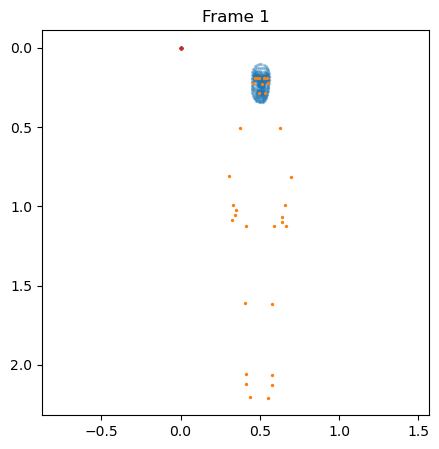

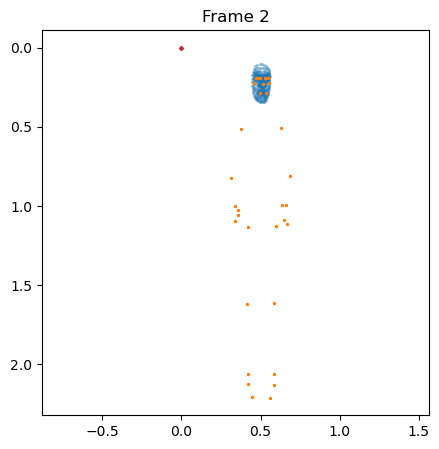

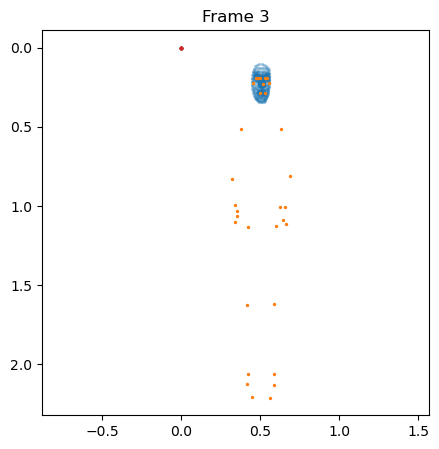

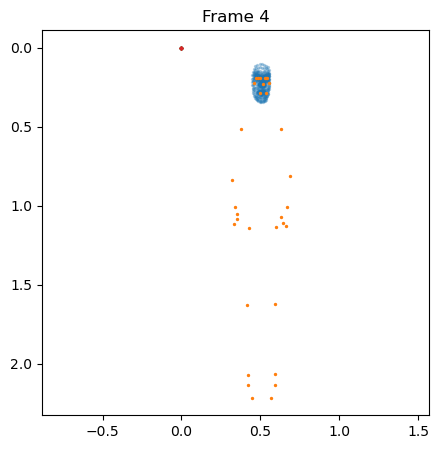

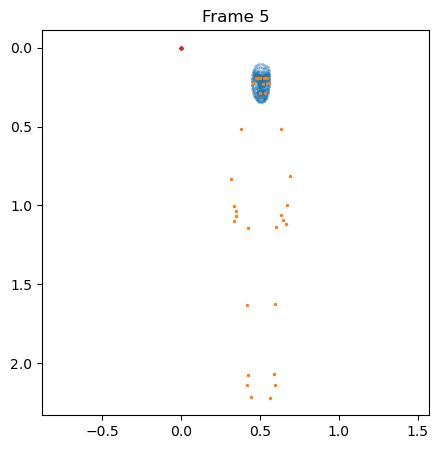

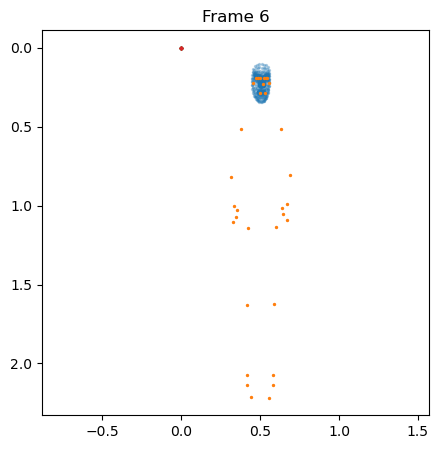

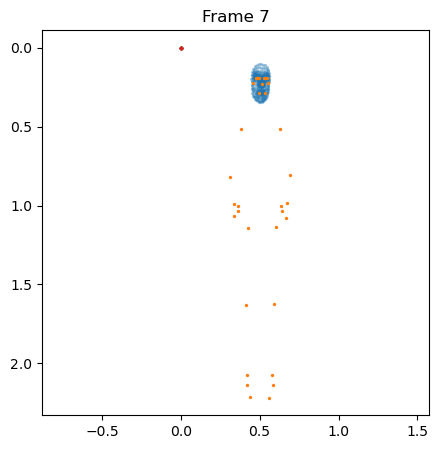

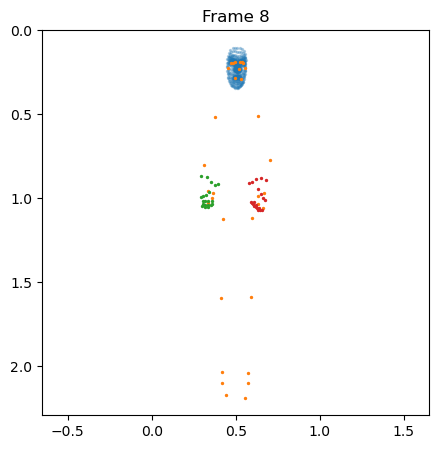

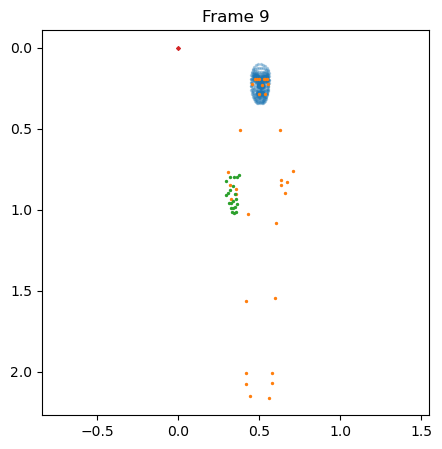

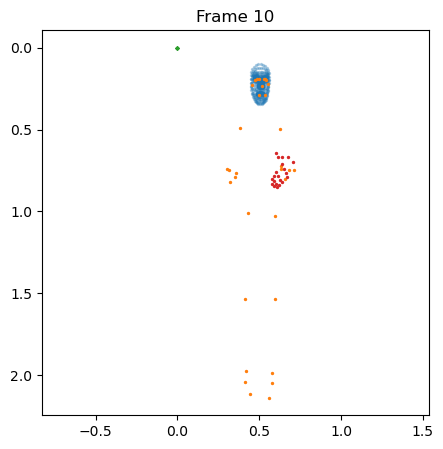

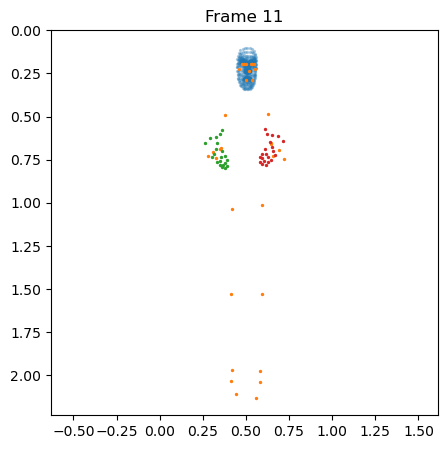

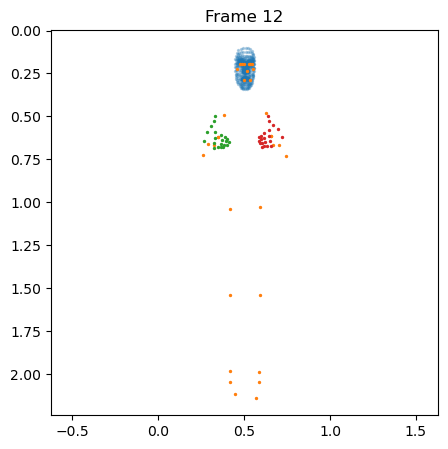

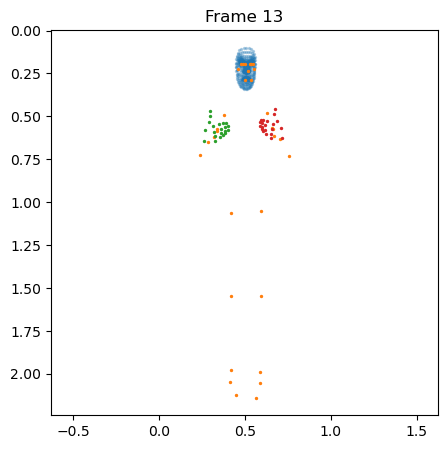

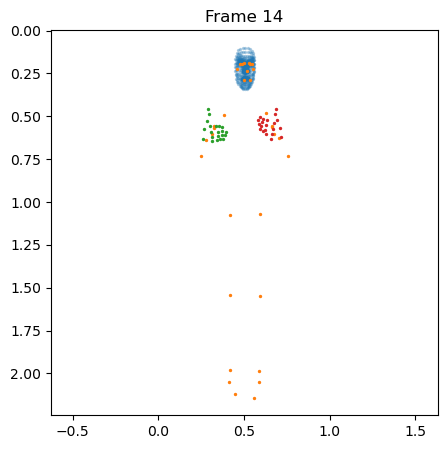

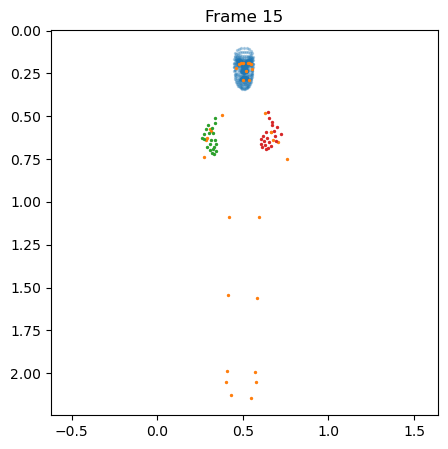

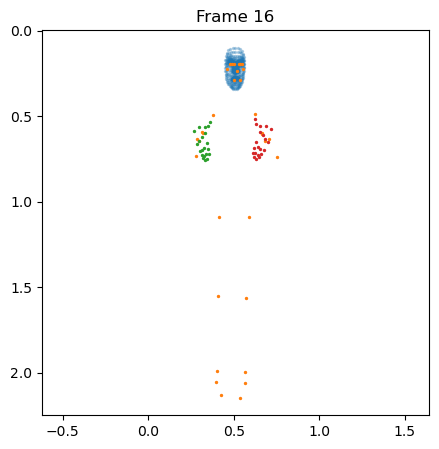

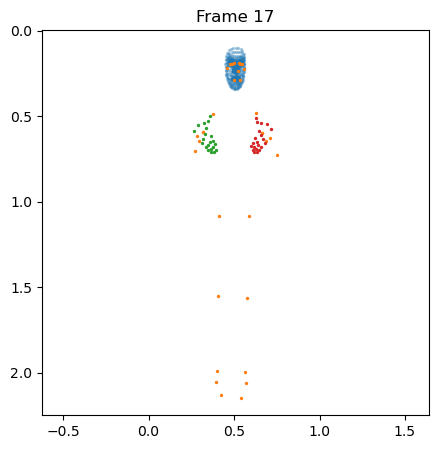

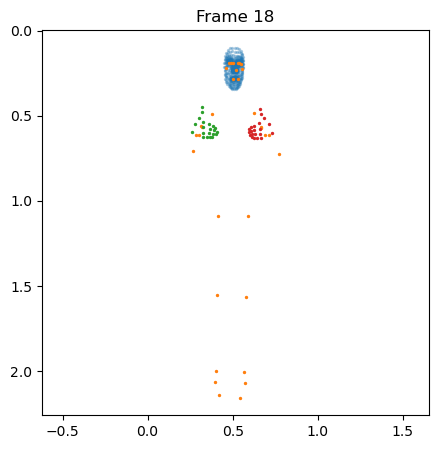

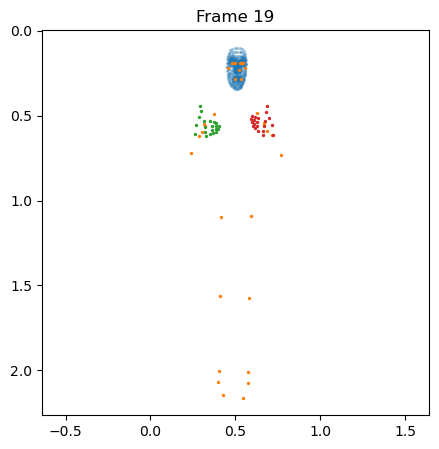

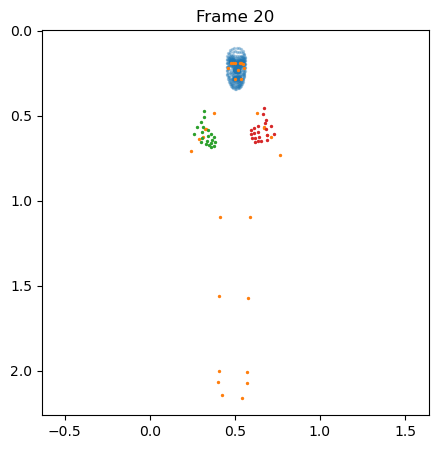

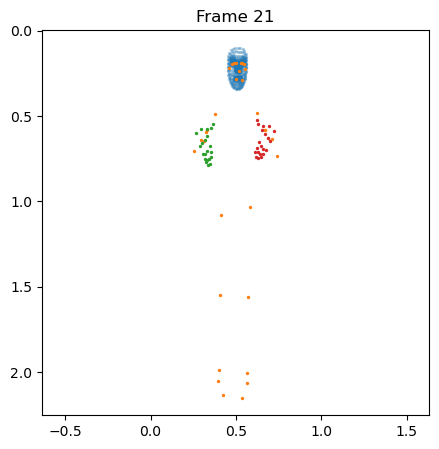

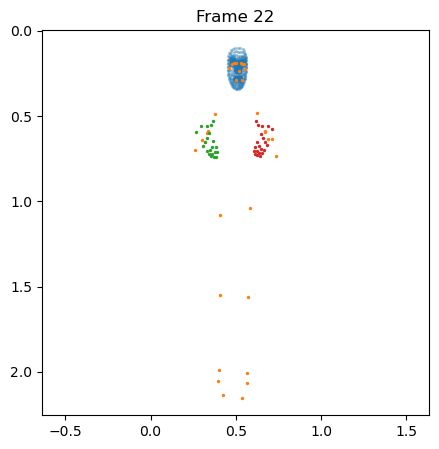

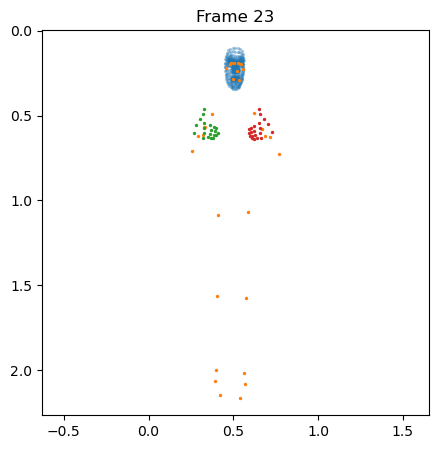

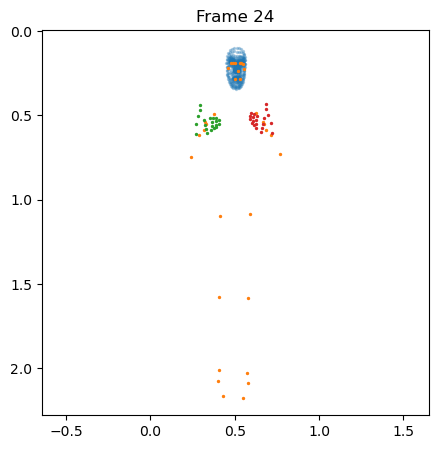

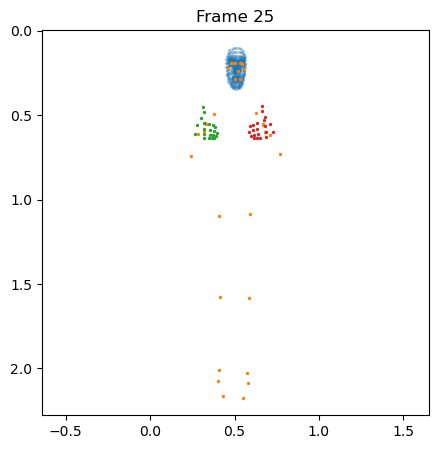

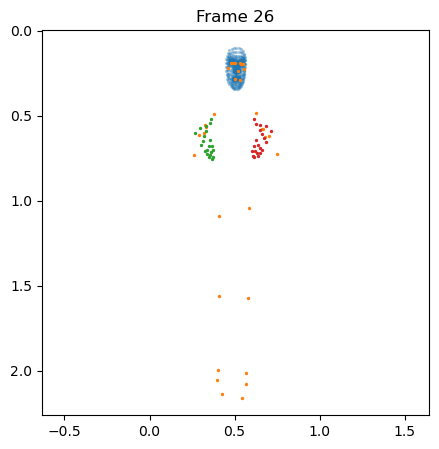

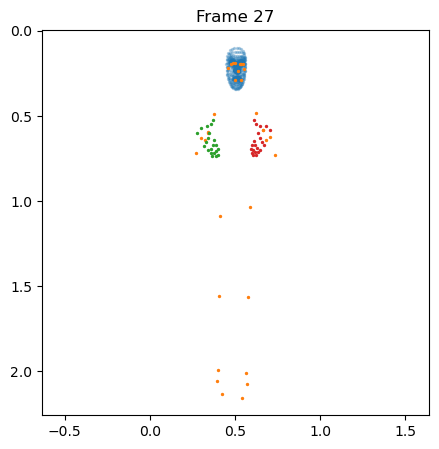

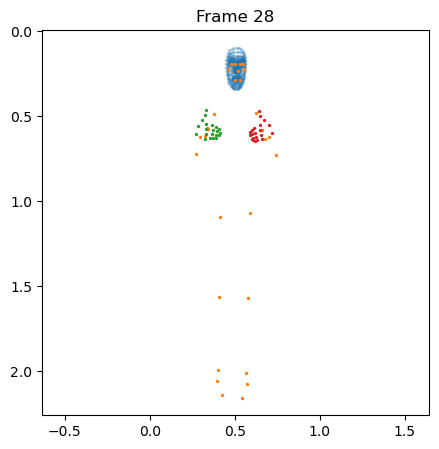

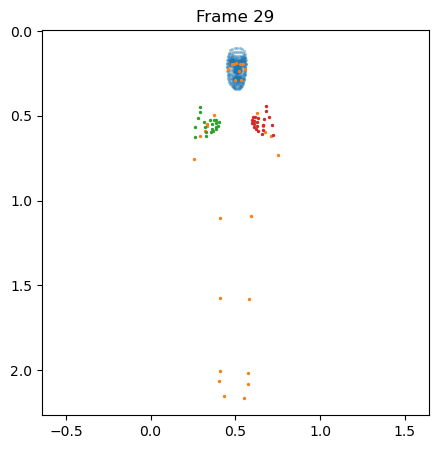

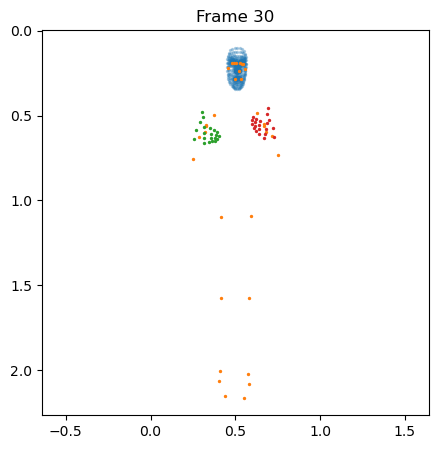

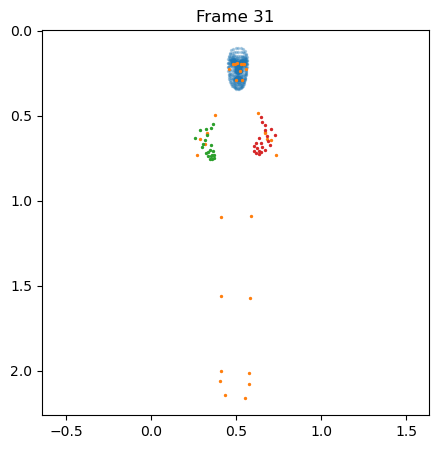

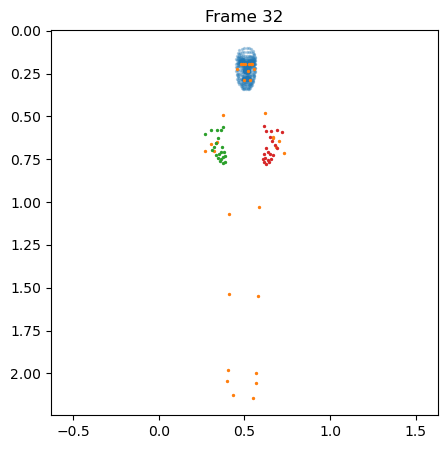

In [72]:
for i, (face, pose, rh, lh) in enumerate(sequence):
    plot_frames(face, pose, rh, lh, title=f"Frame {i+1}")

## 3.6 temporal consistency

In [23]:
def temporal_diff(rep_path):
    frames = sorted(rep_path.glob("frame-**.npy"))
    diffs = []

    for f1, f2 in zip(frames, frames[1:]):
        a = np.load(f1)
        b = np.load(f2)
        diffs.append(np.mean(np.abs(a - b)))

    return np.mean(diffs)

In [24]:
rep = next((Path(DATA_ROOT) / "train").rglob("rep-**"))
print(f"Average temporal difference: {temporal_diff(rep)}") # small values represent a smooth motion

Average temporal difference: 0.004931626362221812


## 3.7 inter-frame correlation

In [102]:
def load_frames(rep_path):
    frames = sorted(rep_path.glob("frame-**.npy"))
    return [np.load(f) for f in frames]

In [104]:
def inter_frame_correlation(frames, landmark_type=""):
    corrs = []
    for i in range(len(frames)-1):
        f1, f2 = frames[i], frames[i+1]
        face1, pose1, rh1, lh1 = split_landmarks(f1)
        face2, pose2, rh2, lh2 = split_landmarks(f2)
        
        if landmark_type == 'face':
            data1, data2 = face1.flatten(), face2.flatten()
        elif landmark_type == 'pose':
            data1, data2 = pose1.flatten(), pose2.flatten()
        elif landmark_type == 'rh':
            data1, data2 = rh1.flatten(), rh2.flatten()
        elif landmark_type == 'lh':
            data1, data2 = lh1.flatten(), lh2.flatten()
        else:
            raise ValueError("Invalid landmark_type")
        
        corr = np.corrcoef(data1, data2)[0,1]
        corrs.append(corr)
    return corrs

In [106]:
results = {}

for split in SPLITS:
    split_path = DATA_ROOT / split
    results[split] = {}

    for sign_path in split_path.iterdir():
        if not sign_path.is_dir():
            continue
        results[split][sign_path.name] = {}

        for rep_path in sign_path.iterdir():
            if not rep_path.is_dir():
                continue
            frames = load_frames(rep_path)
            results[split][sign_path.name][rep_path.name] = {
                'face': inter_frame_correlation(frames, 'face'),
                'pose': inter_frame_correlation(frames, 'pose'),
                'rh': inter_frame_correlation(frames, 'rh'),
                'lh': inter_frame_correlation(frames, 'lh')
            }

In [128]:
print(results['train']['assalomu_alaykum']['rep-1']['rh'])
# most values are very close to 1, there is a strong inter-frame correlation, but need to handle nan values

[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(0.9977674256102503), np.float64(0.9978882611819828), np.float64(0.9966631207791489), np.float64(0.9982400231005516), np.float64(0.9964414439036889), np.float64(0.9956378723611635), np.float64(0.9993629317370112), np.float64(0.9870810003888837), np.float64(0.9993509039988681), np.float64(0.9956529023388314), np.float64(0.9956319368995951), np.float64(0.9998321229658292), np.float64(0.991525139458622), np.float64(0.9962187812996297), np.float64(0.9989206628981617), np.float64(0.9943419443906801), np.float64(0.9959838977431575), np.float64(0.9986980227852396), np.float64(0.9859912372938691), np.float64(0.9996391056402423), np.float64(0.9940504532021704), np.float64(0.9948476758291169), np.float64(0.9998360412406045), np.float64(0.9908529631122185), np.float64(0.9955705010866204)]


In [143]:
"""
    Now will try to get the overall inter-frame correlation across all splits
"""

'\n    Now will try to get the overall inter-frame correlation across all splits\n'

In [129]:
def get_all_frames(split_path):
    for sign_path in split_path.iterdir():
        if not sign_path.is_dir():
            continue
        for rep_path in sign_path.iterdir():
            if not rep_path.is_dir():
                continue
                
            for frame_file in sorted(rep_path.glob("frame-*.npy")):
                yield np.load(frame_file)

In [136]:
def safe_corrcoef(x, y, eps=1e-8): # helps to avoid zero variance that causes nan output
    if np.std(x) < eps or np.std(y) < eps:
        return 0.0
    return np.corrcoef(x, y)[0,1]

In [137]:
def overall_inter_frame_correlation(split='train'):
    split_path = DATA_ROOT / split
    prev_landmarks = None
    sums = {'face': 0.0, 'pose': 0.0, 'rh': 0.0, 'lh': 0.0}
    counts = 0

    for vec in get_all_frames(split_path):
        face, pose, rh, lh = split_landmarks(vec)

        face_flat = face.flatten()
        pose_flat = pose.flatten()
        rh_flat   = rh.flatten()
        lh_flat   = lh.flatten()

        if prev_landmarks is not None:
            sums['face'] += safe_corrcoef(prev_landmarks['face'], face_flat)
            sums['pose'] += safe_corrcoef(prev_landmarks['pose'], pose_flat)
            sums['rh']   += safe_corrcoef(prev_landmarks['rh'], rh_flat)
            sums['lh']   += safe_corrcoef(prev_landmarks['lh'], lh_flat)
            counts += 1
        
        prev_landmarks = {'face': face_flat, 'pose': pose_flat, 'rh': rh_flat, 'lh': lh_flat}

    mean_corrs = {k: sums[k]/counts for k in sums}
    return mean_corrs

In [138]:
train_corr = overall_inter_frame_correlation('train')
val_corr   = overall_inter_frame_correlation('validation')
test_corr  = overall_inter_frame_correlation('test')

In [141]:
print("Overall inter-frame correlation (train):", train_corr)
print("Overall inter-frame correlation (validation):", val_corr)
print("Overall inter-frame correlation (test):", test_corr)

Overall inter-frame correlation (train): {'face': np.float64(0.998120735376264), 'pose': np.float64(0.997743163224194), 'rh': np.float64(0.6151516299132952), 'lh': np.float64(0.61557962670415)}
Overall inter-frame correlation (validation): {'face': np.float64(0.9987922947751999), 'pose': np.float64(0.9977497880423635), 'rh': np.float64(0.6155846314602614), 'lh': np.float64(0.6096859578661079)}
Overall inter-frame correlation (test): {'face': np.float64(0.9990593628260211), 'pose': np.float64(0.9977805277847546), 'rh': np.float64(0.6062763254362689), 'lh': np.float64(0.6128203611760417)}


In [142]:
for split_name, corr in zip(['train', 'validation', 'test'], [train_corr, val_corr, test_corr]):
    print(f"Overall inter-frame correlation ({split_name}):")
    for landmark, value in corr.items():
        print(f"  {landmark:>4}: {value:.4f}")
    print()

Overall inter-frame correlation (train):
  face: 0.9981
  pose: 0.9977
    rh: 0.6152
    lh: 0.6156

Overall inter-frame correlation (validation):
  face: 0.9988
  pose: 0.9977
    rh: 0.6156
    lh: 0.6097

Overall inter-frame correlation (test):
  face: 0.9991
  pose: 0.9978
    rh: 0.6063
    lh: 0.6128



As per Sohn, H. (2023) hypothesis:
> _Direct Quote:_ "if there is a strong inter-frame correlation, 1D CNNs would be more efficient than Transformers."

Indeed, we can see from our dataset as well, that there is a strong inter-frame correlation between face and pose, while right/left hands have a moderate inter-frame correlation. It is expected for both hands to have smaller corrs because compared to face/pose, it moves more often and in some frames they completely disappear.

**Reference:**
Sohn, H. (2023). _1st place solution - 1DCNN combined with Transformer_. Available at: https://www.kaggle.com/competitions/asl-signs/writeups/hoyeol-sohn-1st-place-solution-1dcnn-combined-with [Accessed: 27 December 2025]